# 1.Import libraries and data (understand the data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\user\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data=pd.read_csv('C://Users/user/Downloads/data science/ML.Algorithams/logistic regression/titanic_data.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# 2.Check data quality & Missing value treatment 

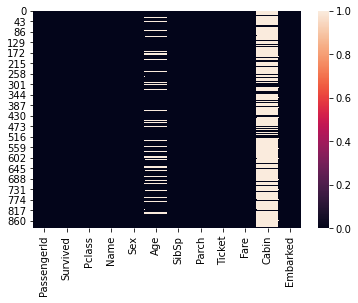

In [5]:
sns.heatmap(data.isnull())

In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

we have missing values in 3 different variables i.e., ('Age','Cabin','Embarked')

In [7]:
print('percentage of missing Age records is %.2f%%' %((data['Age'].isnull().sum()/data.shape[0])*100))

percentage of missing Age records is 19.87%


approximately 20% of Age records are missing in the data so lets see how Age variable look like in general 

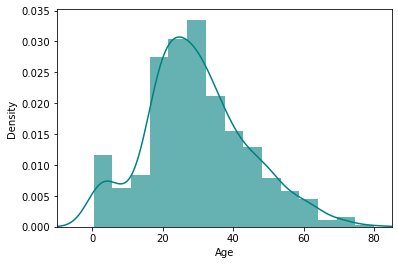

In [8]:
ax = data["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
data["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()


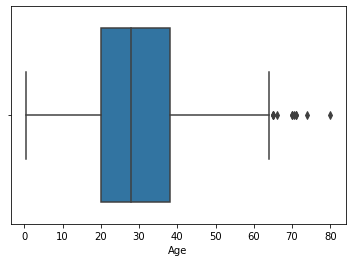

In [9]:
    sns.boxplot(x=data['Age'])

Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. To deal with this, we'll use the median to impute the missing values.

In [10]:
#mean age
print('mean of age is %2.f' %(data['Age'].mean(skipna=True)))
#median age
print('median of age is %2.f' %(data['Age'].median(skipna=True)))

mean of age is 30
median of age is 28


In [11]:
print('percentage of missing Cabin records is %.2f%%' %((data['Cabin'].isnull().sum()/data.shape[0])*100))

percentage of missing Cabin records is 77.10%


77% of records are missing, which means that imputing information and using this variable for prediction is probably not wise. We'll ignore this variable in our model.

In [12]:
print('percentage of missing Embarked records is %.2f%%' %((data['Embarked'].isnull().sum()/data.shape[0])*100))

percentage of missing Embarked records is 0.22%


S    644
C    168
Q     77
Name: Embarked, dtype: int64


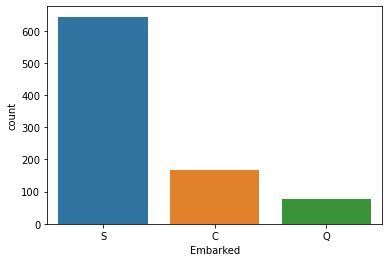

In [13]:
print(data['Embarked'].value_counts())
sns.countplot(x='Embarked', data=data)
plt.show()

In [14]:
print('Most common boarding point of embarkation is %s.' %data['Embarked'].value_counts().idxmax())

Most common boarding point of embarkation is S.


Final adjustments to data 

Based on my assessment of the missing values in the dataset, I'll make the following changes to the data:

If "Age" is missing for a given row, I'll impute with 28 (median age).
If "Embarked" is missing for a riven row, I'll impute with "S" (the most common boarding port).
I'll ignore "Cabin" as a variable. There are too many missing values 

In [15]:
newdata=data.copy()
newdata['Age'].fillna(data['Age'].median(skipna=True),inplace=True)
newdata['Embarked'].fillna(data['Embarked'].value_counts().idxmax(),inplace=True)
newdata.drop('Cabin',axis=1,inplace=True)

In [16]:
newdata.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [17]:
newdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


COMPARING AGE VARIABLE DISTRIBUTION BEFORE AND AFTER

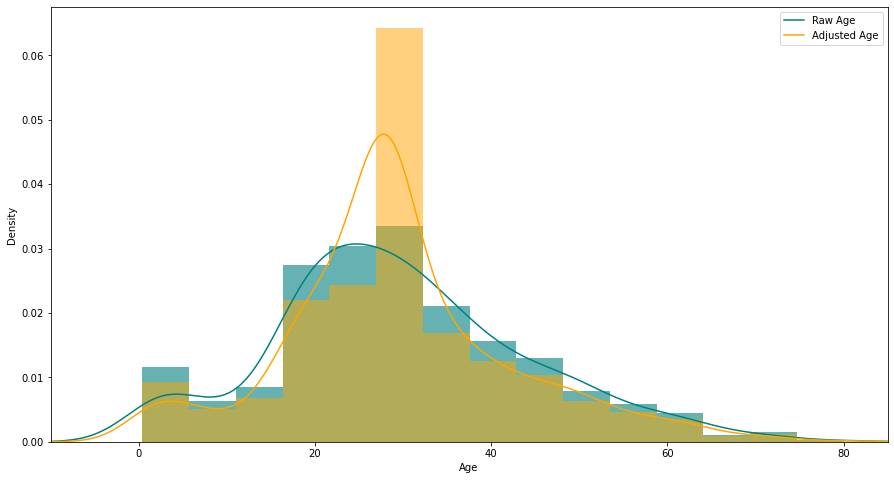

In [18]:
plt.figure(figsize=(15,8))
ax=data["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
data["Age"].plot(kind='density', color='teal')
ax = newdata["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
newdata["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

# 3.Data Wrangling

both SibSp and Parch relate to traveling with family. For simplicity's sake (and to account for possible multicollinearity), I'll combine the effect of these variables into one categorical predictor: whether or not that individual was traveling alone.

In [19]:
newdata['TravelAlone']=np.where((newdata["SibSp"]+newdata["Parch"])>0, 0, 1)
newdata.drop('SibSp', axis=1, inplace=True)
newdata.drop('Parch', axis=1, inplace=True)

I'll also create categorical variables for Passenger Class ("Pclass"), Gender ("Sex"), and Port Embarked ("Embarked")

In [20]:
training=pd.get_dummies(newdata, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_data = training
final_data.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


# 4.EDA

EXPLORATION OF "Age"

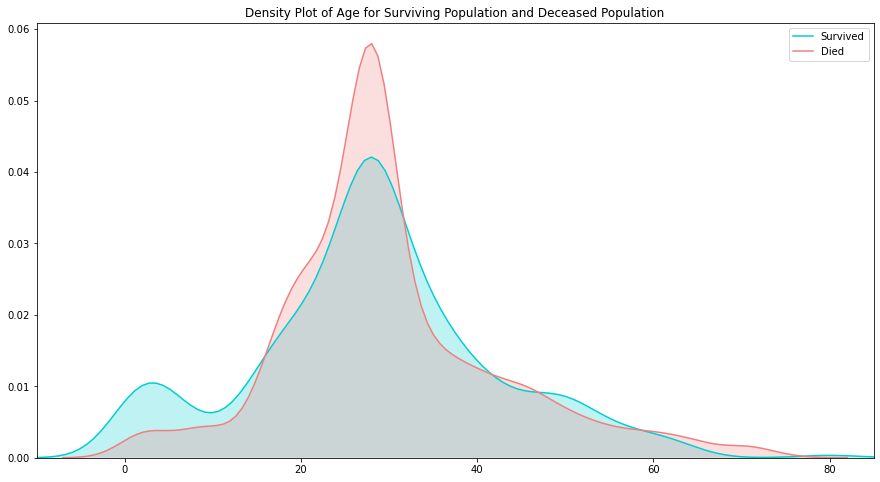

In [21]:
plt.figure(figsize=(15,8))
sns.kdeplot(final_data['Age'][final_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_data["Age"][final_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()


Considering the survival rate of passengers under 16, I'll also include another categorical variable in my dataset: "Minor"

In [22]:
final_data['IsMinor']=np.where(final_data['Age']<=16, 1, 0)

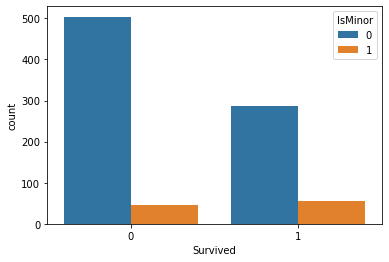

In [23]:
sns.countplot(x='Survived',hue='IsMinor',data=final_data)


EXPLORATION OF FARE

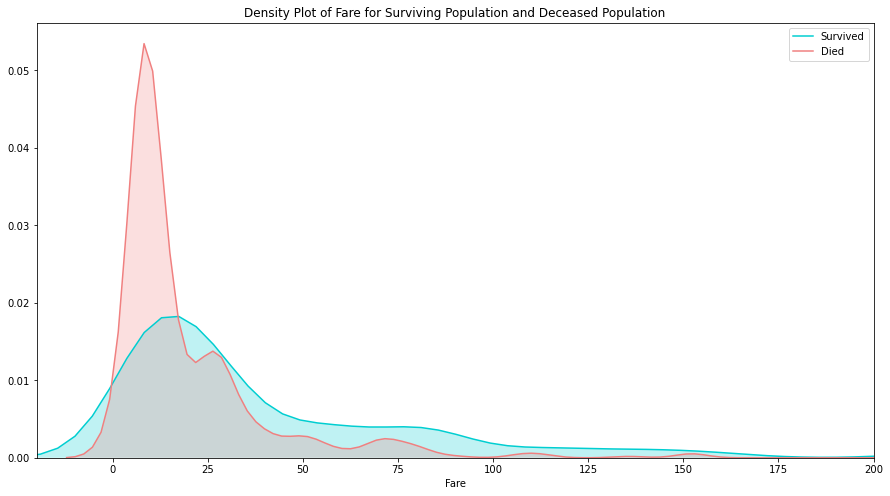

In [24]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final_data["Fare"][final_data.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_data["Fare"][final_data.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

As the distributions are clearly different for the fares of survivors vs. deceased, it's likely that this would be a significant predictor in our final model. Passengers who paid lower fare appear to have been less likely to survive. This is probably strongly correlated with Passenger Class, which we'll look at next.

EXPLORATION OF P CLASS

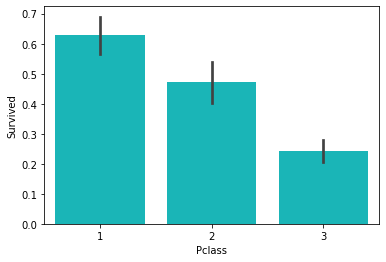

In [25]:
sns.barplot('Pclass', 'Survived', data=newdata, color="darkturquoise")
plt.show()

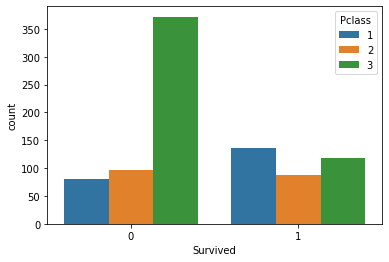

In [26]:
sns.countplot(x='Survived',hue='Pclass',data=newdata)

from the above plots first class passenger was safest.

EXPLORATION  OF EMBARKED

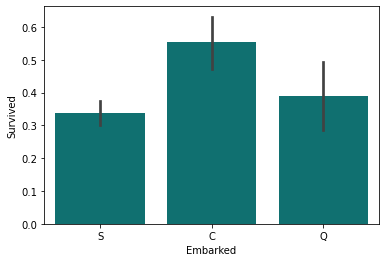

In [27]:
sns.barplot('Embarked', 'Survived', data=newdata, color="teal")
plt.show()

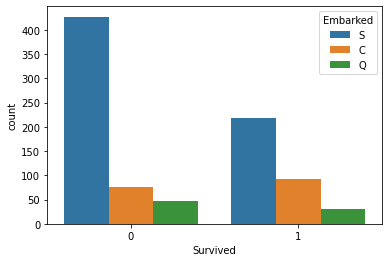

In [28]:
sns.countplot(x='Survived',hue='Embarked',data=newdata)

EXPLORATION OF TRAVELLING ALONE VS WITH FAMILY

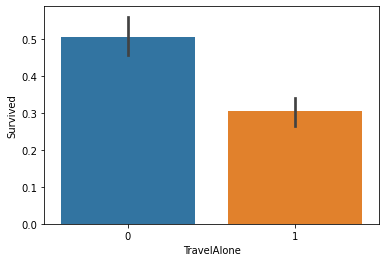

In [29]:
sns.barplot('TravelAlone', 'Survived', data=final_data)
plt.show()

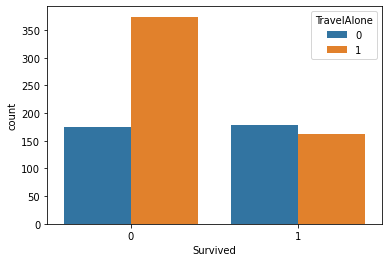

In [30]:
sns.countplot(x='Survived',hue='TravelAlone',data=final_data)

EXPLORATION OF GENDER VARIABLE

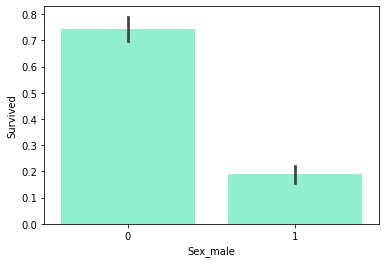

In [31]:
sns.barplot('Sex_male', 'Survived', data=final_data, color="aquamarine")
plt.show()

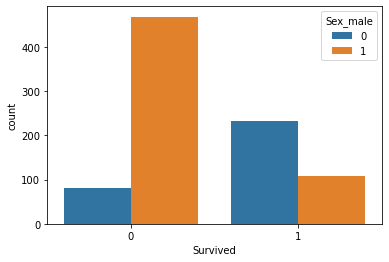

In [32]:
sns.countplot(x='Survived',hue='Sex_male',data=final_data)

# 5.selecting variables or Feature Selection

In [33]:
final_data.head(2)

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,0,0,0,1,0,0,1,1,0
1,1,38.0,71.2833,0,1,0,0,1,0,0,0,0


In [34]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Age          891 non-null    float64
 2   Fare         891 non-null    float64
 3   TravelAlone  891 non-null    int32  
 4   Pclass_1     891 non-null    uint8  
 5   Pclass_2     891 non-null    uint8  
 6   Pclass_3     891 non-null    uint8  
 7   Embarked_C   891 non-null    uint8  
 8   Embarked_Q   891 non-null    uint8  
 9   Embarked_S   891 non-null    uint8  
 10  Sex_male     891 non-null    uint8  
 11  IsMinor      891 non-null    int32  
dtypes: float64(2), int32(2), int64(1), uint8(7)
memory usage: 34.1 KB


In [35]:
final_data.corr()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
Survived,1.000000,-0.064910,0.257307,-0.203367,0.285904,0.093349,-0.322308,0.168240,0.003650,-0.149683,-0.543351,0.121485
Age,-0.064910,1.000000,0.096688,0.171647,0.323896,0.015831,-0.291955,0.030248,-0.031415,-0.006729,0.081163,-0.583515
Fare,0.257307,0.096688,1.000000,-0.271832,0.591711,-0.118557,-0.413333,0.269335,-0.117216,-0.162184,-0.182333,-0.004405
TravelAlone,-0.203367,0.171647,-0.271832,1.000000,-0.113364,-0.039070,0.129472,-0.095298,0.086464,0.029074,0.303646,-0.321665
Pclass_1,0.285904,0.323896,0.591711,-0.113364,1.000000,-0.288585,-0.626738,0.296423,-0.155342,-0.161921,-0.098013,-0.126463
Pclass_2,0.093349,0.015831,-0.118557,-0.039070,-0.288585,1.000000,-0.565210,-0.125416,-0.127301,0.189980,-0.064746,0.003066
Pclass_3,-0.322308,-0.291955,-0.413333,0.129472,-0.626738,-0.565210,1.000000,-0.153329,0.237449,-0.015104,0.137143,0.106466
Embarked_C,0.168240,0.030248,0.269335,-0.095298,0.296423,-0.125416,-0.153329,1.000000,-0.148258,-0.782742,-0.082853,0.001316
Embarked_Q,0.003650,-0.031415,-0.117216,0.086464,-0.155342,-0.127301,0.237449,-0.148258,1.000000,-0.499421,-0.074115,-0.020778
Embarked_S,-0.149683,-0.006729,-0.162184,0.029074,-0.161921,0.189980,-0.015104,-0.782742,-0.499421,1.000000,0.119224,0.011923


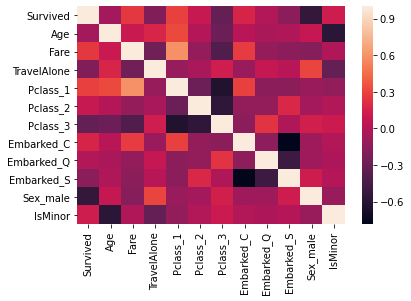

In [36]:
sns.heatmap(final_data.corr())

Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
columns = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Pclass_3","Embarked_Q","Embarked_C",
           "Embarked_S","Sex_male","IsMinor"]
X=final_data[columns]
y=final_data['Survived']
#building logistic regression for feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['TravelAlone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_C', 'Sex_male', 'IsMinor']


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Feature ranking with recursive feature elimination and cross-validation


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

Optimal number of features: 10
Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']


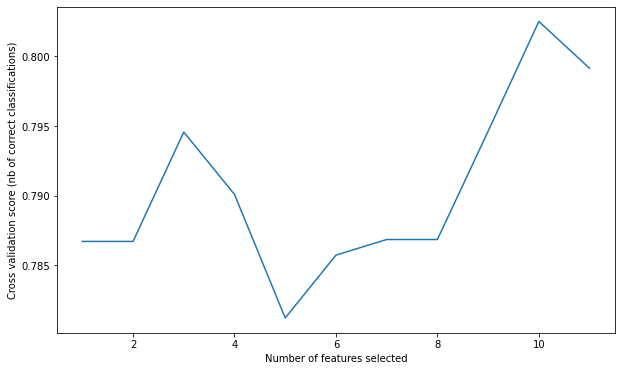

In [38]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

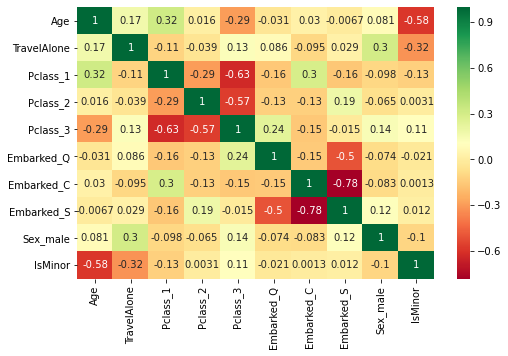

In [39]:
Selected_features = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_Q', 
                     'Embarked_C', 'Embarked_S', 'Sex_male', 'IsMinor']
X = final_data[Selected_features]

plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [40]:
X.head()

,Age,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_Q,Embarked_C,Embarked_S,Sex_male,IsMinor
0,22.0,0,0,0,1,0,0,1,1,0
1,38.0,0,1,0,0,0,1,0,0,0
2,26.0,1,0,0,1,0,0,1,0,0
3,35.0,0,1,0,0,0,0,1,0,0
4,35.0,1,0,0,1,0,0,1,1,0


In [41]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train.loc[:,['Age']] = sc.fit_transform(X_train.loc[:,['Age']])

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [44]:
X_test.loc[:,['Age']] = sc.fit_transform(X_test.loc[:,['Age']])

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
y_pred=model.predict(X_test)

In [47]:
model.score(X_test,y_test)

0.8044692737430168

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,89,16,105
1,19,55,74
All,108,71,179


In [49]:
confusion_matrix

array([[89, 16],
       [19, 55]], dtype=int64)

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



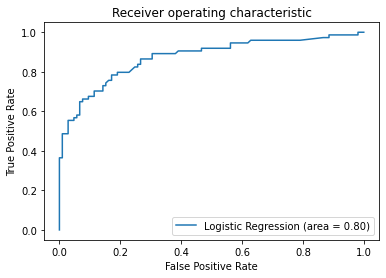

In [51]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
area_under_curve = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % area_under_curve)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [52]:
model.predict_proba(X_test)

array([[0.87026752, 0.12973248],
       [0.75496806, 0.24503194],
       [0.90645773, 0.09354227],
       [0.10000164, 0.89999836],
       [0.1968842 , 0.8031158 ],
       [0.11666016, 0.88333984],
       [0.37216601, 0.62783399],
       [0.84776038, 0.15223962],
       [0.20907845, 0.79092155],
       [0.12115369, 0.87884631],
       [0.67804905, 0.32195095],
       [0.93138765, 0.06861235],
       [0.51277954, 0.48722046],
       [0.85695278, 0.14304722],
       [0.76772512, 0.23227488],
       [0.06521045, 0.93478955],
       [0.69318326, 0.30681674],
       [0.37216601, 0.62783399],
       [0.74442729, 0.25557271],
       [0.67788295, 0.32211705],
       [0.9111137 , 0.0888863 ],
       [0.63679467, 0.36320533],
       [0.48119069, 0.51880931],
       [0.90645773, 0.09354227],
       [0.91555951, 0.08444049],
       [0.83656301, 0.16343699],
       [0.50609403, 0.49390597],
       [0.75496806, 0.24503194],
       [0.82471235, 0.17528765],
       [0.48801626, 0.51198374],
       [0.

In [53]:
def adjusted_classes(y_pred, t):
    return [1 if y >= t else 0 for y in y_pred]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    
    y_pred_adj = adjusted_classes(y_pred, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

In [54]:
adjusted_classes(model.predict_proba(X_test)[:,1],0.5)

[0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1]

In [55]:
adjusted_classes(model.predict_proba(X_test)[:,1],0.3)

[0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1]